In [28]:
# Import necessary libraries

import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical calculations and data analysis

import seaborn as sns  # Statistical graphics creation
import matplotlib.pyplot as plt  # Two-dimensional plotting

# Data science libraries
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()  # Creating a Logistic Regression model object

In [31]:
data = pd.read_csv("trainFinal.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
print(datos['Sex'].unique())

[1 0]


In [35]:
#Inicialmente se valida que los dos únicos generos sean Male y Female y se actualizan con codificación Binaria. Male=1 Female=0
datos['Sex'] = datos['Sex'].map({'Male': 1, 'Female': 0})

In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Distribución de Datos Faltantes')

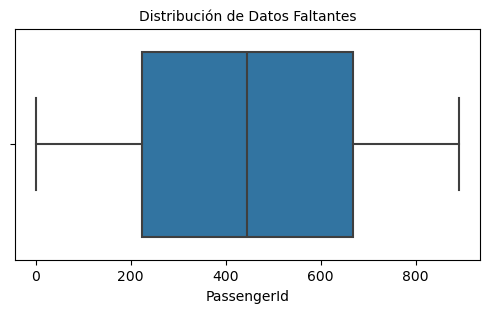

In [37]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['PassengerId' ])
plt.title('Distribución de Datos Faltantes', fontsize=10)

Text(0.5, 1.0, 'Distribución de Datos Faltantes')

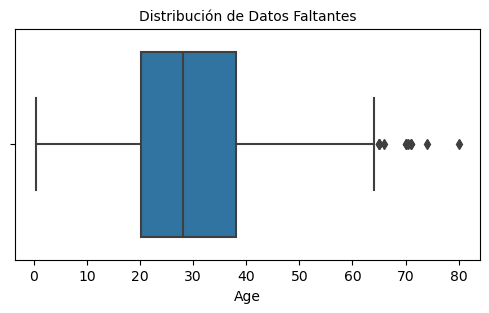

In [38]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age' ])
plt.title('Distribución de Datos Faltantes', fontsize=10)

Text(0.5, 1.0, 'Distribución de Datos Faltantes')

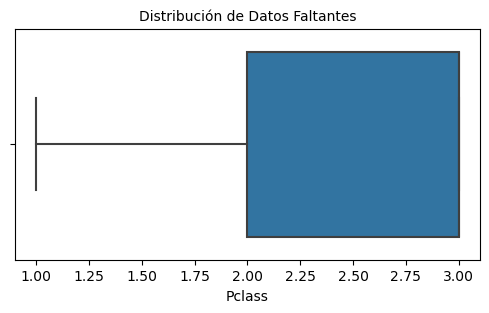

In [39]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Pclass' ])
plt.title('Distribución de Datos Faltantes', fontsize=10)

In [40]:
print("Cantidad de registros con valor cero en edad: ",data['Age'].isin([0]).sum())
print("Cantidad de registros con valor cero en PassengerId: ",data['PassengerId'].isin([0]).sum())

Cantidad de registros con valor cero en edad:  0
Cantidad de registros con valor cero en PassengerId:  0


In [41]:
# Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
# Conteo de datos atípicos en la columna "Age"
Total_Atipicos=((data ['Age'] <nivel_minimo) | (data ['Age']>nivel_maximo)).sum()

# Impresión del total de datos atípicos
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
#condición: 0 = No survived, 1 = survived
data[ 'Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [44]:
data[['Survived']].head(30)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [45]:
X = data.drop('Survived',axis=1)
Y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [46]:
print (X_train)

     PassengerId  Pclass                                             Name  \
105          106       3                            Mionoff, Mr. Stoytcho   
68            69       3                  Andersson, Miss. Erna Alexandra   
253          254       3                         Lobb, Mr. William Arthur   
320          321       3                               Dennis, Mr. Samuel   
706          707       2                    Kelly, Mrs. Florence "Fannie"   
..           ...     ...                                              ...   
835          836       1                      Compton, Miss. Sara Rebecca   
192          193       3  Andersen-Jensen, Miss. Carla Christine Nielsine   
629          630       3                         O'Connell, Mr. Patrick D   
559          560       3     de Messemaeker, Mrs. Guillaume Joseph (Emma)   
684          685       2                Brown, Mr. Thomas William Solomon   

        Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
105   

In [47]:
print (Y_train)

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: int64


In [50]:
# Suponiendo que X_train y Y_train ya están definidos
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

In [51]:
# Preprocesar los datos
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    X_train_encoded[column] = label_encoders[column].fit_transform(X_train[column])
    X_test_encoded[column] = label_encoders[column].transform(X_test[column])

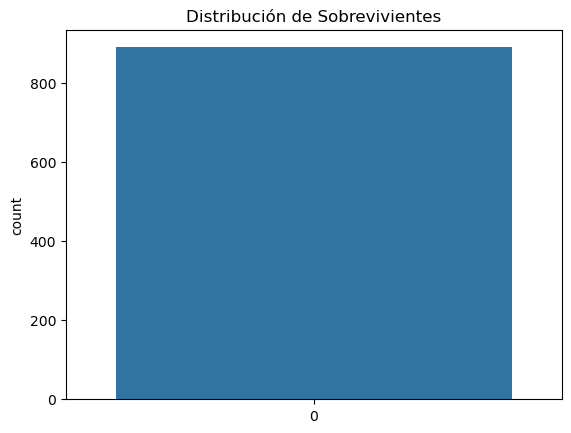

In [57]:
sns.countplot(data['Survived'])
plt.title('Distribución de Sobrevivientes')
plt.show()

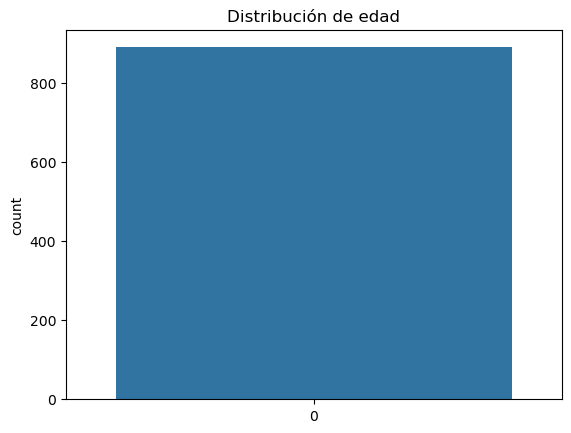

In [59]:
sns.countplot(data['Age'])
plt.title('Distribución de edad')
plt.show()

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


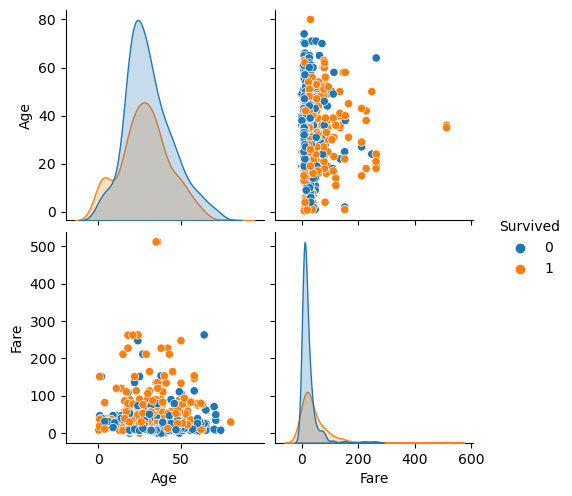

In [60]:
# Visualizar la relación entre variables numéricas
sns.pairplot(data[['Age', 'Fare', 'Survived']], hue='Survived', diag_kind='kde')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

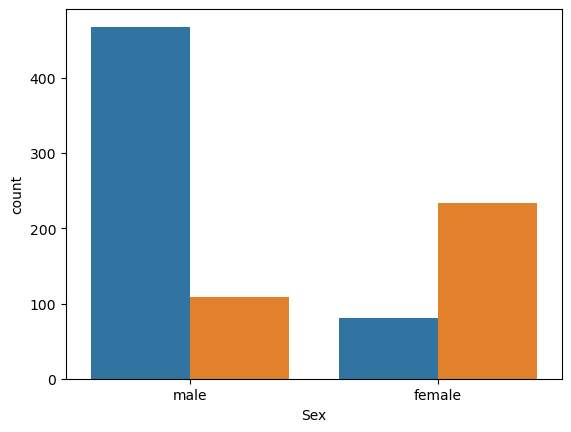

In [61]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Sobrevivientes por género')
plt.show()


In [62]:
# Tratar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [63]:
# Codificar variables categóricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [65]:
# Utilizar SelectKBest para seleccionar las características más relevantes
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(X, y)

In [66]:
# Obtener las características seleccionadas
features = X.columns[selector.get_support()]
print("Características seleccionadas:", features)

Características seleccionadas: Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')


In [67]:
# Paso 4: Dividir el conjunto de datos en Train y Test

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [68]:
# Inicializar y entrenar el modelo de regresión logística
modelo_logistica = LogisticRegression(solver='liblinear')
modelo_logistica.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [69]:
# Realizar predicciones en el conjunto de test
y_pred = modelo_logistica.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



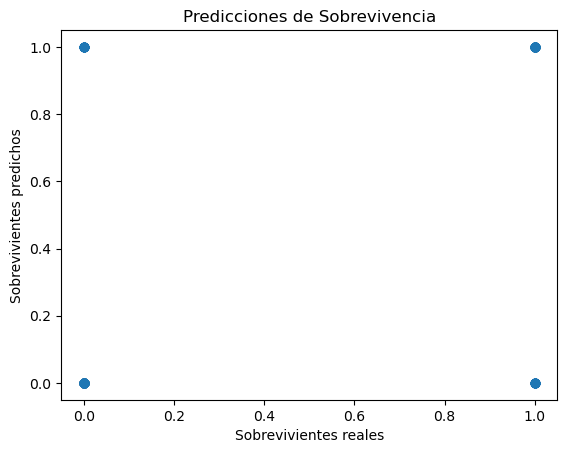

In [71]:
# Gráfica de dispersión para visualizar las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Sobrevivientes reales")
plt.ylabel("Sobrevivientes predichos")
plt.title("Predicciones de Sobrevivencia")
plt.show()

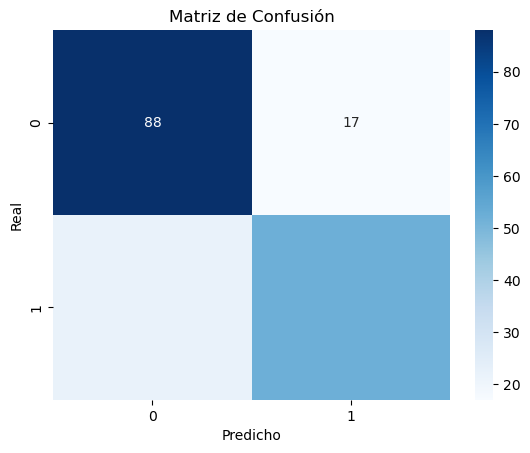

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

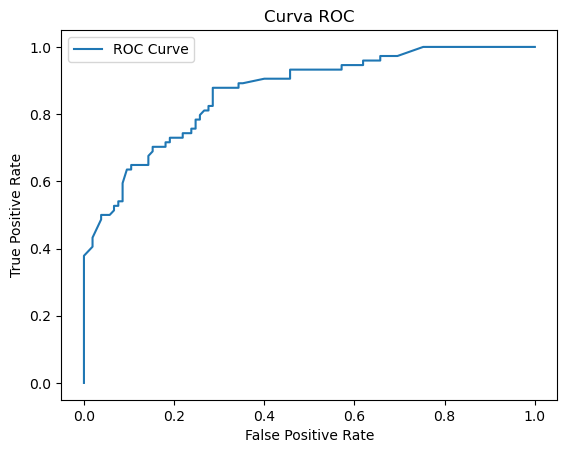

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, modelo_logistica.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

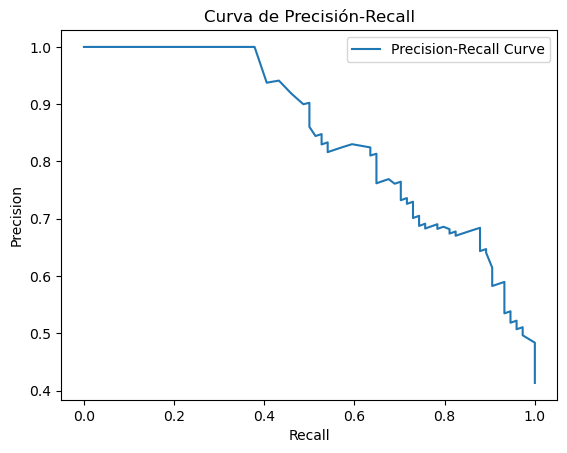

In [74]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, modelo_logistica.predict_proba(X_test)[:,1])
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.legend()
plt.show()

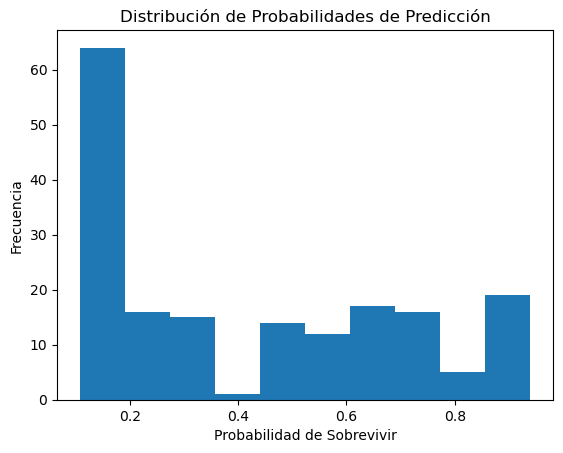

In [75]:
# Obtener las probabilidades de predicción para la clase 1 (Sobrevivió)
probs = modelo_logistica.predict_proba(X_test)[:, 1]

# Histograma de las probabilidades de predicción
plt.hist(probs, bins=10)
plt.xlabel('Probabilidad de Sobrevivir')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades de Predicción')
plt.show()

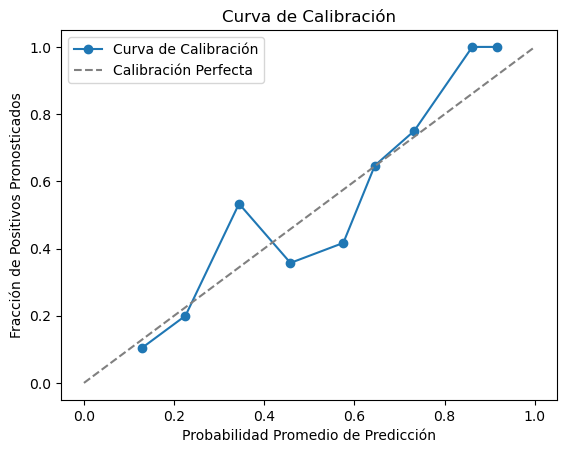

In [76]:
from sklearn.calibration import calibration_curve

# Obtener la fracción de los positivos pronosticados (fpp) y la fracción de los positivos reales (fpr)
fpp, fpr = calibration_curve(y_test, probs, n_bins=10)

# Gráfica de calibración
plt.plot(fpr, fpp, marker='o', label='Curva de Calibración')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Calibración Perfecta')
plt.xlabel('Probabilidad Promedio de Predicción')
plt.ylabel('Fracción de Positivos Pronosticados')
plt.title('Curva de Calibración')
plt.legend()
plt.show()